# Setup and Data Preparation

In [2]:
pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=2c97537b7ab25dee7782c8fa87110c1f05ad355583bfaa8719f028238bb53ad6
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [9]:
# Import necessary modules
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Initialize Spark session
spark = SparkSession.builder \
    .appName("OnlineNewsPopularity") \
    .getOrCreate()

# Load dataset into DataFrame
data = spark.read.csv("/content/online_news_popularity.csv", header=True, inferSchema=True)



In [10]:
data

DataFrame[url: string,  timedelta: int,  n_tokens_title: int,  n_tokens_content: int,  n_unique_tokens: double,  n_non_stop_words: double,  n_non_stop_unique_tokens: double,  num_hrefs: int,  num_self_hrefs: int,  num_imgs: int,  num_videos: int,  average_token_length: double,  num_keywords: int,  data_channel_is_lifestyle: int,  data_channel_is_entertainment: int,  data_channel_is_bus: int,  data_channel_is_socmed: int,  data_channel_is_tech: int,  data_channel_is_world: int,  kw_min_min: int,  kw_max_min: double,  kw_avg_min: double,  kw_min_max: int,  kw_max_max: int,  kw_avg_max: double,  kw_min_avg: double,  kw_max_avg: double,  kw_avg_avg: double,  self_reference_min_shares: double,  self_reference_max_shares: double,  self_reference_avg_sharess: double,  weekday_is_monday: int,  weekday_is_tuesday: int,  weekday_is_wednesday: int,  weekday_is_thursday: int,  weekday_is_friday: int,  weekday_is_saturday: int,  weekday_is_sunday: int,  is_weekend: int,  LDA_00: double,  LDA_01: do

In [11]:
data.columns

['url',
 ' timedelta',
 ' n_tokens_title',
 ' n_tokens_content',
 ' n_unique_tokens',
 ' n_non_stop_words',
 ' n_non_stop_unique_tokens',
 ' num_hrefs',
 ' num_self_hrefs',
 ' num_imgs',
 ' num_videos',
 ' average_token_length',
 ' num_keywords',
 ' data_channel_is_lifestyle',
 ' data_channel_is_entertainment',
 ' data_channel_is_bus',
 ' data_channel_is_socmed',
 ' data_channel_is_tech',
 ' data_channel_is_world',
 ' kw_min_min',
 ' kw_max_min',
 ' kw_avg_min',
 ' kw_min_max',
 ' kw_max_max',
 ' kw_avg_max',
 ' kw_min_avg',
 ' kw_max_avg',
 ' kw_avg_avg',
 ' self_reference_min_shares',
 ' self_reference_max_shares',
 ' self_reference_avg_sharess',
 ' weekday_is_monday',
 ' weekday_is_tuesday',
 ' weekday_is_wednesday',
 ' weekday_is_thursday',
 ' weekday_is_friday',
 ' weekday_is_saturday',
 ' weekday_is_sunday',
 ' is_weekend',
 ' LDA_00',
 ' LDA_01',
 ' LDA_02',
 ' LDA_03',
 ' LDA_04',
 ' global_subjectivity',
 ' global_sentiment_polarity',
 ' global_rate_positive_words',
 ' global_

# Data Preprocessing

In [25]:
from pyspark.sql.functions import col

# Select columns to keep
columns_to_keep = [col for col in data.columns if col not in ['url', 'timedelta']]

# Create a new DataFrame with selected columns
data = data.select(columns_to_keep)

# Show the updated DataFrame
data.show(4)


+----------+---------------+-----------------+----------------+-----------------+-------------------------+----------+---------------+---------+-----------+---------------------+-------------+--------------------------+------------------------------+--------------------+-----------------------+---------------------+----------------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+--------------------------+--------------------------+---------------------------+------------------+-------------------+---------------------+--------------------+------------------+--------------------+------------------+-----------+-----------+-----------+-----------+-----------+-----------+--------------------+--------------------------+---------------------------+---------------------------+--------------------+--------------------+----------------------+----------------------+----------------------+----------------------+-------------------

# Exploratory Data Analysis (EDA)

In [53]:
# Describe the 'kw_min_min' column
data.select(' kw_min_min').describe().show()


+-------+-----------------+
|summary|       kw_min_min|
+-------+-----------------+
|  count|            39644|
|   mean|26.10680052466956|
| stddev|69.63321512144333|
|    min|               -1|
|    max|              377|
+-------+-----------------+



In [54]:
# Filter the DataFrame for shares less than or equal to 100000
temp_df = data.filter(col(' shares') <= 100000)


In [55]:
# Select columns for the pair plot
kw_cols = [' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
            ' kw_max_avg', ' kw_avg_avg', ' shares']


In [28]:
threshold = data.stat.approxQuantile(" shares", [0.5], 0.01)[0]
data = data.withColumn("popularity", (data[" shares"] >= threshold).cast("int"))

In [31]:
data.show(5)

+----------+---------------+-----------------+----------------+-----------------+-------------------------+----------+---------------+---------+-----------+---------------------+-------------+--------------------------+------------------------------+--------------------+-----------------------+---------------------+----------------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+--------------------------+--------------------------+---------------------------+------------------+-------------------+---------------------+--------------------+------------------+--------------------+------------------+-----------+-----------+-----------+-----------+-----------+-----------+--------------------+--------------------------+---------------------------+---------------------------+--------------------+--------------------+----------------------+----------------------+----------------------+----------------------+-------------------

In [34]:
import matplotlib.pyplot as plt

In [36]:
data.printSchema()


root
 |--  timedelta: integer (nullable = true)
 |--  n_tokens_title: integer (nullable = true)
 |--  n_tokens_content: integer (nullable = true)
 |--  n_unique_tokens: double (nullable = true)
 |--  n_non_stop_words: double (nullable = true)
 |--  n_non_stop_unique_tokens: double (nullable = true)
 |--  num_hrefs: integer (nullable = true)
 |--  num_self_hrefs: integer (nullable = true)
 |--  num_imgs: integer (nullable = true)
 |--  num_videos: integer (nullable = true)
 |--  average_token_length: double (nullable = true)
 |--  num_keywords: integer (nullable = true)
 |--  data_channel_is_lifestyle: integer (nullable = true)
 |--  data_channel_is_entertainment: integer (nullable = true)
 |--  data_channel_is_bus: integer (nullable = true)
 |--  data_channel_is_socmed: integer (nullable = true)
 |--  data_channel_is_tech: integer (nullable = true)
 |--  data_channel_is_world: integer (nullable = true)
 |--  kw_min_min: integer (nullable = true)
 |--  kw_max_min: double (nullable = tru

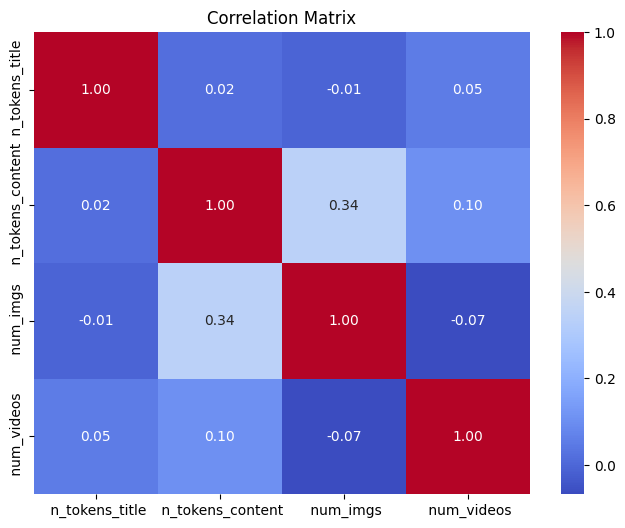

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Relationship between shares and other numerical features
numeric_features = [" n_tokens_title", " n_tokens_content", " num_imgs", " num_videos"]

# Correlation matrix
numeric_data = data.select(numeric_features)
correlation_matrix = numeric_data.toPandas().corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [41]:
#the characteristics of popular articles.
popular_articles = data.filter(data.popularity == 1)

# Calculate summary statistics for relevant features
summary_statistics = popular_articles.describe()

# Show summary statistics
summary_statistics.show()

+-------+------------------+------------------+------------------+------------------+------------------+-------------------------+------------------+------------------+-----------------+------------------+---------------------+------------------+--------------------------+------------------------------+--------------------+-----------------------+---------------------+----------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+-----------------+------------------+--------------------------+--------------------------+---------------------------+-------------------+-------------------+---------------------+--------------------+-------------------+--------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+-------------------+--------------------+--------------------------+---------------------------+-----------------

In [42]:
#the characteristics of non-popular articles.
popular_articles = data.filter(data.popularity == 0)

# Calculate summary statistics for relevant features
summary_statistics1 = non_popular_articles.describe()

# Show summary statistics
summary_statistics1.show()

+-------+------------------+------------------+------------------+-------------------+-------------------+-------------------------+-----------------+-----------------+------------------+-----------------+---------------------+------------------+--------------------------+------------------------------+--------------------+-----------------------+---------------------+----------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+-----------------+------------------+--------------------------+--------------------------+---------------------------+-------------------+-------------------+---------------------+--------------------+-------------------+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+--------------------------+---------------------------+---------------

In [50]:
# Calculate summary statistics for each feature
for column in data.columns:
    if column != 'popularity':  # Exclude the target column
        popular_mean = popular_articles.agg({column: "avg"}).collect()[0][0]
        non_popular_mean = non_popular_articles.agg({column: "avg"}).collect()[0][0]

        print("Feature:", column)
        print("Mean for popular articles:", popular_mean)
        print("Mean for non-popular articles:", non_popular_mean)
        print("Difference in mean:", popular_mean - non_popular_mean)
        print()

Feature:  timedelta
Mean for popular articles: 344.64699837750135
Mean for non-popular articles: 344.64699837750135
Difference in mean: 0.0

Feature:  n_tokens_title
Mean for popular articles: 10.498269334775554
Mean for non-popular articles: 10.498269334775554
Difference in mean: 0.0

Feature:  n_tokens_content
Mean for popular articles: 525.636884802596
Mean for non-popular articles: 525.636884802596
Difference in mean: 0.0

Feature:  n_unique_tokens
Mean for popular articles: 0.5375337206691179
Mean for non-popular articles: 0.5375337206691179
Difference in mean: 0.0

Feature:  n_non_stop_words
Mean for popular articles: 0.9734451005643268
Mean for non-popular articles: 0.9734451005643268
Difference in mean: 0.0

Feature:  n_non_stop_unique_tokens
Mean for popular articles: 0.6818708648156278
Mean for non-popular articles: 0.6818708648156278
Difference in mean: 0.0

Feature:  num_hrefs
Mean for popular articles: 9.790048674959438
Mean for non-popular articles: 9.790048674959438
Diff

In [51]:
# Calculate summary statistics for each feature
for column in data.columns:
    if column != 'popularity':  # Exclude the target column
        popular_summary = popular_articles.select(column).describe().toPandas()
        non_popular_summary = non_popular_articles.select(column).describe().toPandas()

        print("Feature:", column)
        print("Summary statistics for popular articles:")
        print(popular_summary)
        print("Summary statistics for non-popular articles:")
        print(non_popular_summary)
        print()

Feature:  timedelta
Summary statistics for popular articles:
  summary           timedelta
0   count               18490
1    mean  344.64699837750135
2  stddev  213.56053006854893
3     min                   8
4     max                 731
Summary statistics for non-popular articles:
  summary           timedelta
0   count               18490
1    mean  344.64699837750135
2  stddev  213.56053006854893
3     min                   8
4     max                 731

Feature:  n_tokens_title
Summary statistics for popular articles:
  summary      n_tokens_title
0   count               18490
1    mean  10.498269334775554
2  stddev  2.0989947167277343
3     min                   3
4     max                  20
Summary statistics for non-popular articles:
  summary      n_tokens_title
0   count               18490
1    mean  10.498269334775554
2  stddev  2.0989947167277343
3     min                   3
4     max                  20

Feature:  n_tokens_content
Summary statistics for popular art

# Feature Engineering

In [68]:
# Create new features
# Example: Article length categories
from pyspark.ml.feature import Bucketizer

bucketizer = Bucketizer(splits=[0, 500, 1000, float('inf')], inputCol=" n_tokens_content", outputCol="article_length_cat")
data = bucketizer.transform(data)


# Model Building

In [74]:
# Importing necessary libraries
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline

In [71]:

# Split dataset into training and testing sets
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Train a classification model (e.g., Logistic Regression)
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline

#  Create a feature vector
feature_cols = [col for col in data.columns if col not in [" shares", "popularity"]]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Initialize the model
lr = LogisticRegression(featuresCol="features", labelCol="popularity")

# Create a pipeline
pipeline = Pipeline(stages=[assembler, lr])

# Train the model
model = pipeline.fit(train_data)

# Model Evaluation

In [72]:

# Make predictions
predictions = model.transform(test_data)

# Evaluate the model
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(labelCol="popularity")
accuracy = evaluator.evaluate(predictions)

# Print evaluation metrics
print("Accuracy:", accuracy)

# Analyze the confusion matrix
predictions.groupBy("popularity", "prediction").count().show()

Accuracy: 0.7099626620779099
+----------+----------+-----+
|popularity|prediction|count|
+----------+----------+-----+
|         1|       0.0| 1207|
|         0|       0.0| 2197|
|         1|       1.0| 2914|
|         0|       1.0| 1514|
+----------+----------+-----+

